<a href="https://colab.research.google.com/github/dan-ski/HR_Attrition_classification/blob/master/22_09_16_(development)_classification_HR_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

#Loading the data

In [5]:
df1 = pd.read_csv('/content/df1.csv')
df1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [6]:
df2 = pd.read_csv('/content/df2.csv')
df2.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [7]:
df = pd.merge(df1, df2, how='inner', on='EmployeeNumber')
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


# Exploratory data analysis and data preparation

In [8]:
df['Attrition'].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

In [10]:
df= df.dropna(subset=['Attrition'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   BusinessTravel            4302 non-null   object 
 3   DailyRate                 4302 non-null   float64
 4   Department                4302 non-null   object 
 5   DistanceFromHome          4302 non-null   float64
 6   Education                 4302 non-null   float64
 7   EducationField            4302 non-null   object 
 8   EmployeeCount             4302 non-null   float64
 9   EnvironmentSatisfaction   4302 non-null   float64
 10  Gender                    4302 non-null   object 
 11  HourlyRate                4302 non-null   float64
 12  JobInvolvement            4302 non-null   float64
 13  JobLevel                  4302 non-null   float64
 14  JobRole 

In [11]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   BusinessTravel            4302 non-null   object 
 3   DailyRate                 4302 non-null   float64
 4   Department                4302 non-null   object 
 5   DistanceFromHome          4302 non-null   float64
 6   Education                 4302 non-null   float64
 7   EducationField            4302 non-null   object 
 8   EmployeeCount             4302 non-null   float64
 9   EnvironmentSatisfaction   4302 non-null   float64
 10  Gender                    4302 non-null   object 
 11  HourlyRate                4302 non-null   float64
 12  JobInvolvement            4302 non-null   float64
 13  JobLevel                  4302 non-null   float64
 14  JobRole 

In [12]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [13]:
df = df.drop(['Over18'], axis=1)

In [14]:
df['EmployeeCount'].unique()

array([1.])

In [15]:
df =df.drop(['EmployeeCount'], axis=1)

In [16]:
# df_2 = df_2.drop(['StandardHours'], axis=1)
df['StandardHours'].unique()

array([80.])

In [17]:
df = df.drop(['StandardHours'], axis=1)

In [18]:
df.columns.sort_values()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearlyIncome', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [19]:
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,Male,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,4.0,Female,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,3.0,Female,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,3.0,Male,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,23412.0


In [20]:
# df = df.drop(['EmployeeNumber'], axis=1)
df.set_index(['EmployeeNumber'])

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,61512.0
1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,93072.0
164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,3.0,Female,46.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,28416.0
395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,39720.0
53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,3.0,Male,75.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,1,95736.0
7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,1,95736.0
7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,1,44496.0


Encoding non-numerical data

In [21]:
df = pd.get_dummies(df, columns = ['Gender', 'Department','EducationField', 'JobRole', 'MaritalStatus', 'OverTime']) # 'BusinessTravel'
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,104,30.0,Travel_Rarely,852.0,1.0,1.0,4.0,55.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,1
1,1638,38.0,Travel_Rarely,397.0,2.0,2.0,4.0,54.0,2.0,3.0,...,1,0,0,0,0,0,1,0,0,1
2,164,26.0,Travel_Rarely,841.0,6.0,3.0,3.0,46.0,2.0,1.0,...,0,0,1,0,0,0,1,0,1,0
3,395,28.0,Travel_Rarely,1117.0,8.0,2.0,4.0,66.0,3.0,1.0,...,0,0,1,0,0,0,0,1,1,0
4,53,35.0,Travel_Rarely,464.0,4.0,2.0,3.0,75.0,3.0,1.0,...,0,0,0,0,0,1,0,0,1,0


In [22]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1,'Travel_Frequently':2 })

In [23]:
df.describe()

,EmployeeNumber,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
count,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,...,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000
mean,4809.243143,429.123199,1.086239,800.843794,34478.313343,2.906788,2.719665,66.036495,2.741516,2.051604,...,0.096932,0.053231,0.205253,0.220828,0.057415,0.212924,0.466062,0.321013,0.718038,0.281962
std,2643.040205,1591.153416,0.534555,405.655763,147682.315767,1.026460,1.092333,20.298352,0.711379,1.102569,...,0.295899,0.224520,0.403934,0.414853,0.232661,0.409422,0.498905,0.466920,0.450007,0.450007
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1680.250000,31.000000,1.000000,457.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5828.500000,36.000000,1.000000,804.000000,8.000000,3.000000,3.000000,66.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6903.750000,45.000000,1.000000,1162.000000,17.000000,4.000000,4.000000,84.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,7979.000000,9890.000000,2.000000,1499.000000,999590.000000,5.000000,4.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data preparation

In [24]:
df['Age'] = df['Age'].map(lambda x: x if (x > 16) & (x<100) else 0)

age_count = ((df['Age'] < 100) & (df['Age'] > 16)).sum()
age_mean = df['Age'].sum()/age_count

df['Age'] = df['Age'].map(lambda x: age_mean if x == 0 else x )


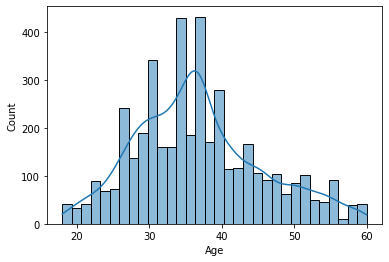

In [25]:
sns.histplot(df.Age, kde=True)

In [26]:
df['DistanceFromHome'] = np.where(df['DistanceFromHome'] >= 100,
                                    (df["DistanceFromHome"]<=100).mean(),df['DistanceFromHome'] )

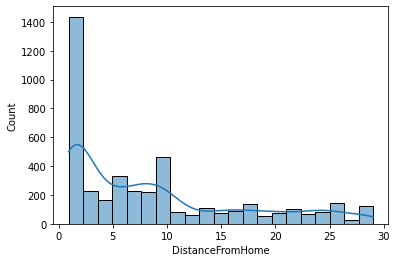

In [27]:
sns.histplot(df.DistanceFromHome, kde=True)

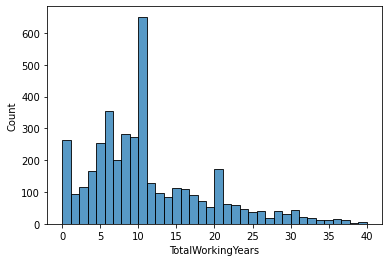

In [28]:
sns.histplot(df.loc[df['TotalWorkingYears'] <= 70, 'TotalWorkingYears'])

In [29]:
df.columns.sort_values()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'DistanceFromHome', 'Education',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender_Female',
       'Gender_Male', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobSatisfaction',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', '

In [30]:
df.loc[df['TotalWorkingYears'] <= 70, 'TotalWorkingYears'].median()

10.0

In [31]:
# year_mean = df.loc[df['TotalWorkingYears'] <= 70, 'TotalWorkingYears'].mean()
# year_mean

year_median = df.loc[df['TotalWorkingYears'] <= 70, 'TotalWorkingYears'].median()
year_median

10.0

In [32]:
# df['TotalWoringYears'] = df['TotalWorkingYears'].map(lambda x: x if x <=70 else year_mean)  
df['TotalWorkingYears'] = df['TotalWorkingYears'].map(lambda x: x if x <=70 else year_median)  

In [33]:
df['TotalWorkingYears'].describe()

count    4302.000000
mean       11.134589
std         7.566109
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [34]:
df['YearsAtCompany'].describe()

count    4302.000000
mean      312.854719
std      1373.999529
min         0.000000
25%         3.000000
50%         5.000000
75%        10.000000
max      9984.000000
Name: YearsAtCompany, dtype: float64

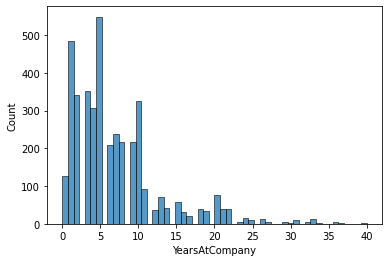

In [35]:
sns.histplot(df.loc[df['YearsAtCompany']<70, 'YearsAtCompany'])

In [36]:
company_years_mode = df['YearsAtCompany'].mode()[0]
company_years_mode

5.0

In [37]:
# df['TotalWoringYears'] = df['TotalWorkingYears'].map(lambda x: x if x <=70 else year_median)
df['YearsAtCompany'] = df['YearsAtCompany'].map(lambda x: x if x<70 else company_years_mode)

In [38]:
df['YearsAtCompany'].describe()

count    4302.000000
mean        6.837517
std         5.898179
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

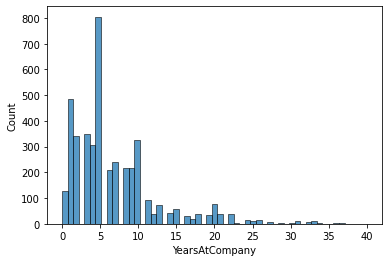

In [39]:
sns.histplot(df.YearsAtCompany)

In [40]:
df[[   'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']].describe()

,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,4302.000000,4302.000000,4302.000000
mean,367.109484,399.000930,334.767550
std,1480.107024,1597.939659,1431.991884
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000
50%,3.000000,1.000000,3.000000
75%,7.000000,4.000000,7.000000
max,9937.000000,9990.000000,9882.000000


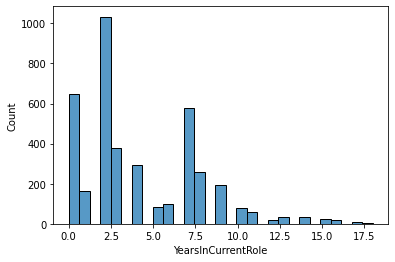

In [41]:
sns.histplot(df.loc[df['YearsInCurrentRole'] <70, 'YearsInCurrentRole'])

In [42]:
current_role_mode = df['YearsInCurrentRole'].mode()[0]
current_role_mode

2.0

In [43]:
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].map(lambda x: x if x<70 else current_role_mode)

In [44]:
df['YearsInCurrentRole'].describe()

count    4302.000000
mean        4.054161
std         3.515085
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

In [45]:
df['YearsSinceLastPromotion'].describe()

count    4302.000000
mean      399.000930
std      1597.939659
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max      9990.000000
Name: YearsSinceLastPromotion, dtype: float64

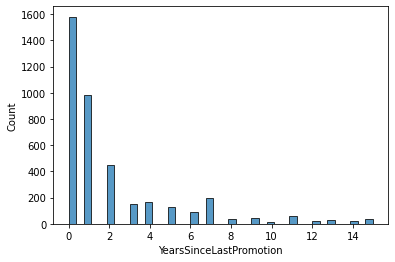

In [46]:
sns.histplot(df.loc[df['YearsSinceLastPromotion']<70, 'YearsSinceLastPromotion'])

In [47]:
last_prom_mode = df['YearsSinceLastPromotion'].mode()[0]
last_prom_mode

0.0

In [48]:
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].map(lambda x: x if x<70 else last_prom_mode)

In [49]:
df['YearsSinceLastPromotion'].describe()

count    4302.000000
mean        2.016272
std         3.148235
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

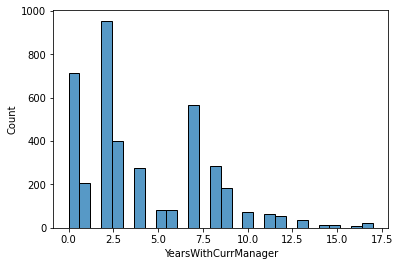

In [50]:
sns.histplot(df.loc[df['YearsWithCurrManager']<70, 'YearsWithCurrManager'])

In [51]:
curr_man_mode = df['YearsWithCurrManager'].mode()[0]
curr_man_mode

2.0

In [52]:
curr_man_mean = df.loc[df['YearsWithCurrManager']<70, 'YearsWithCurrManager'].mean()
curr_man_mean

4.117997025285077

In [53]:
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].map(lambda x: x if x<70 else curr_man_mode)

In [54]:
df['YearsWithCurrManager'].describe()

count    4302.000000
mean        3.986053
std         3.505108
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

### Correlation between columns

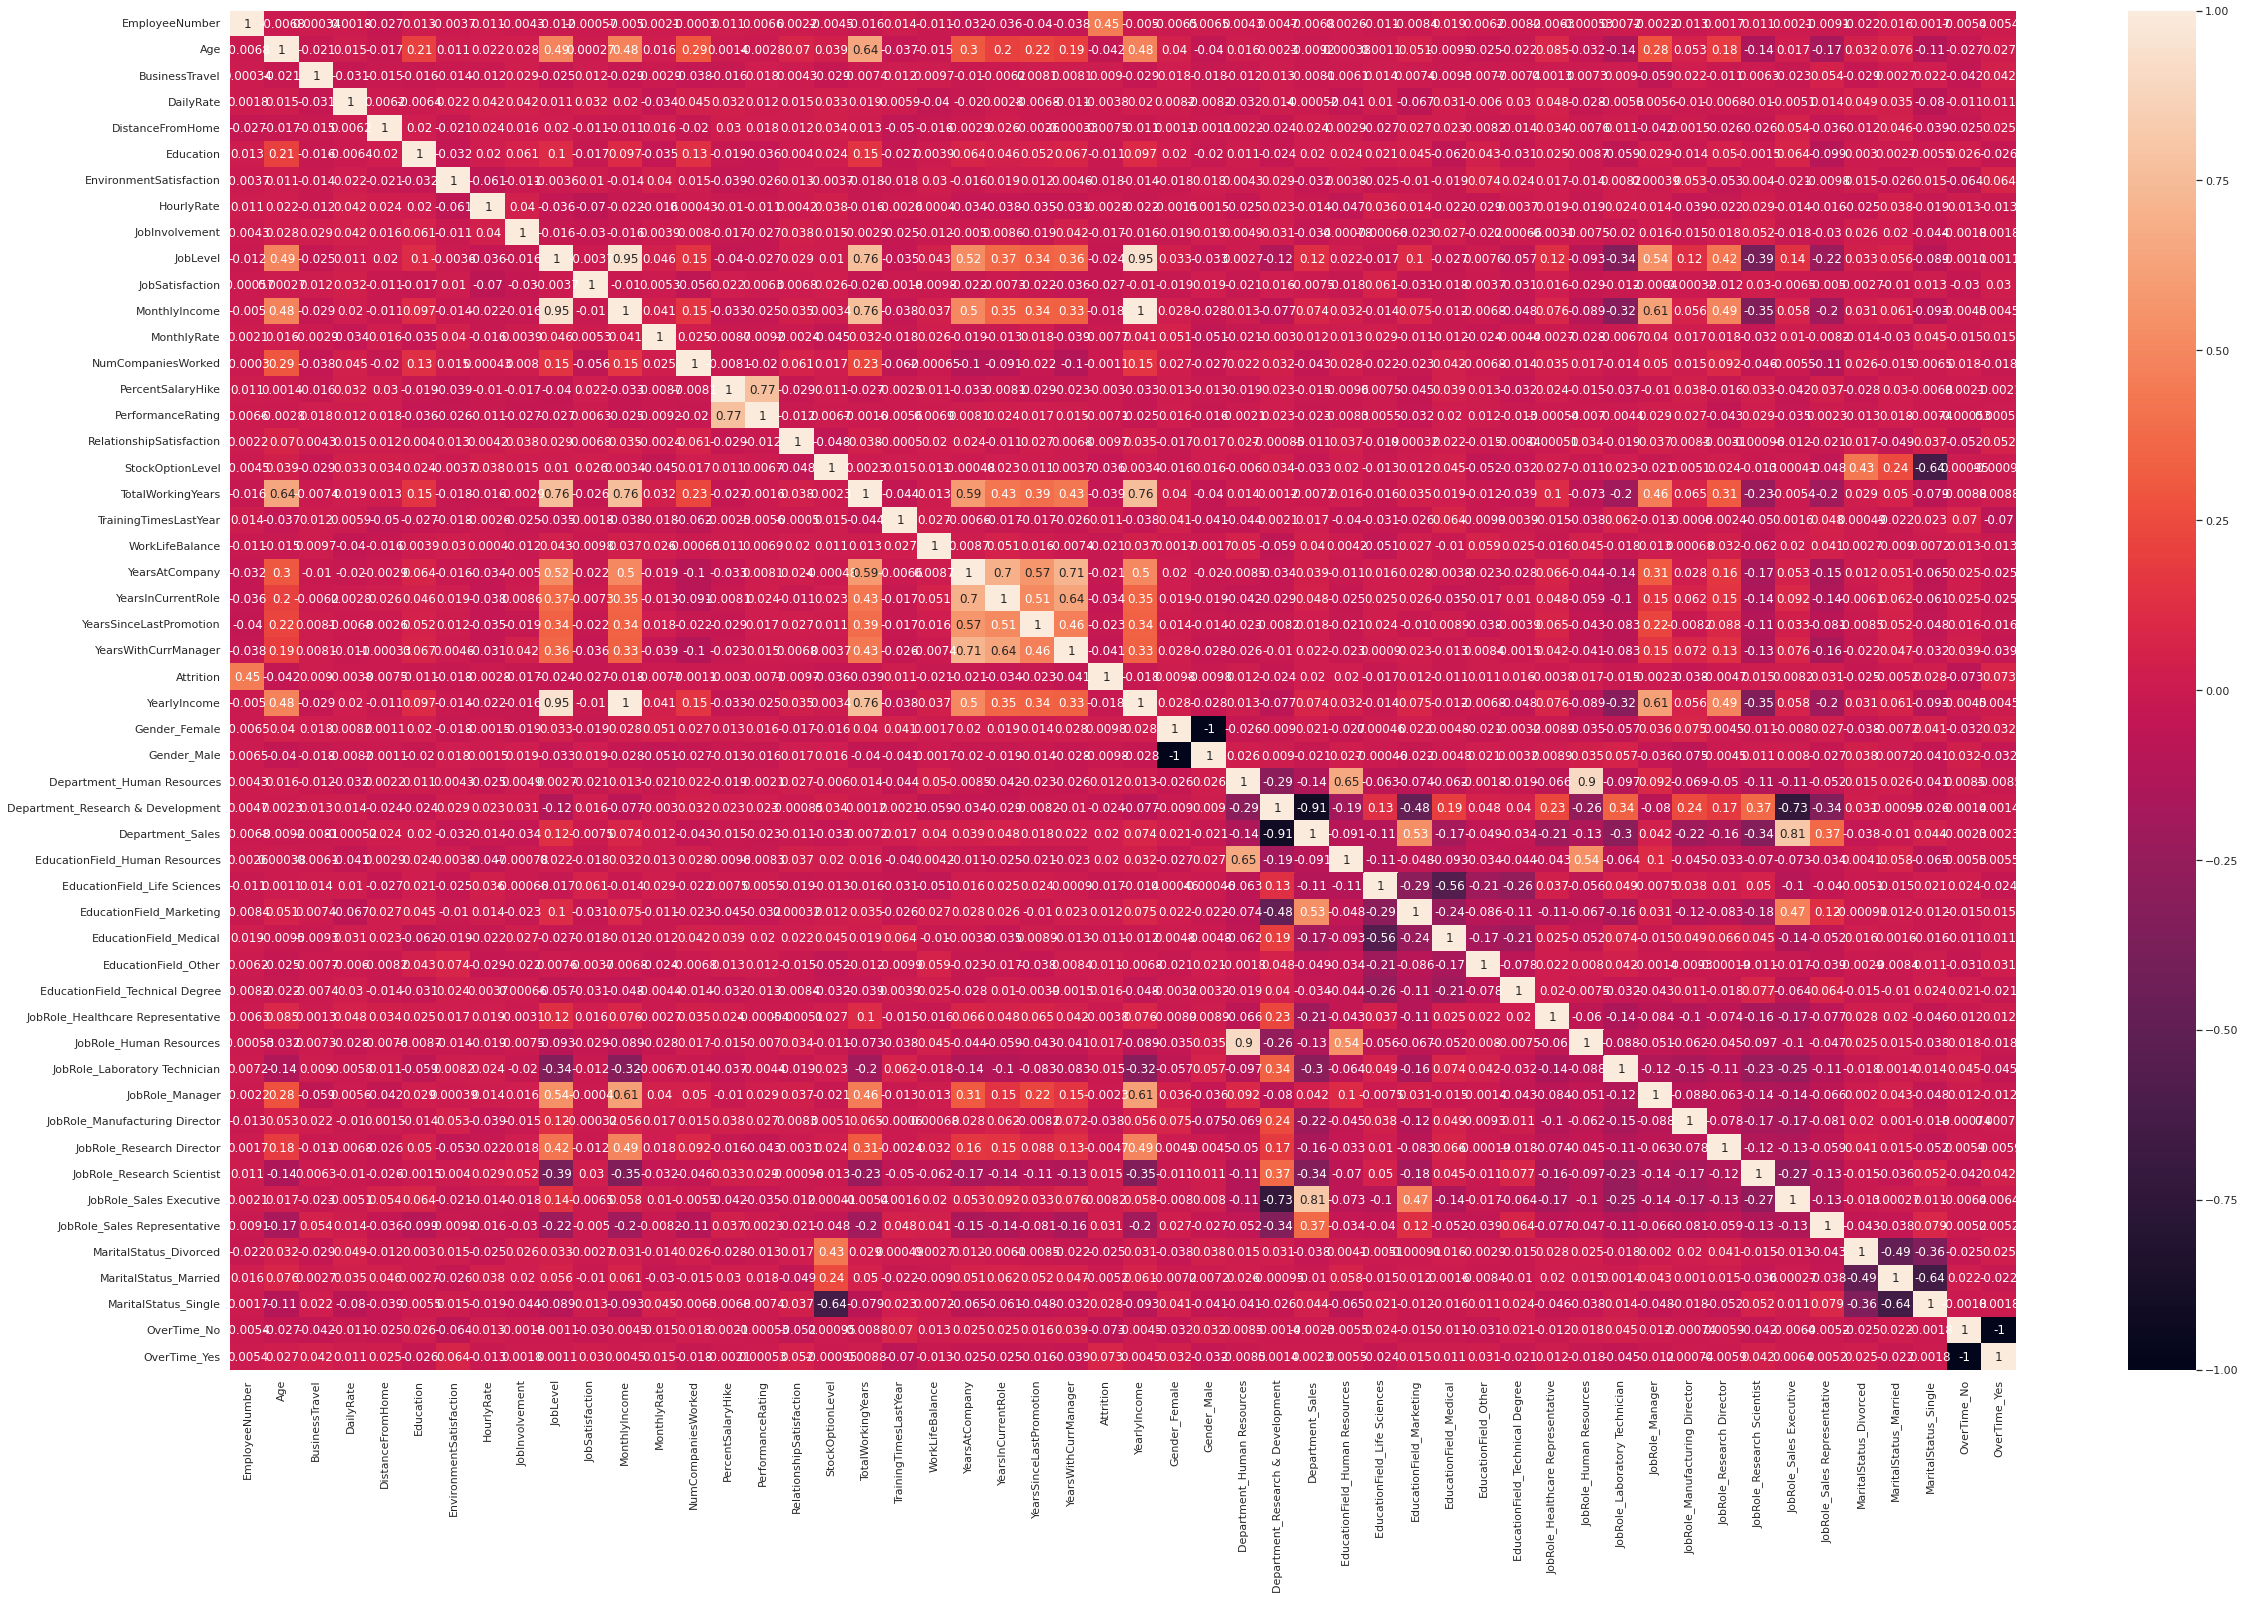

In [55]:
corr = df.corr()

sns.set(rc= {'figure.figsize': (40,25)})
sns.heatmap(corr, annot=True)

Creating training and test models

In [56]:
from sklearn.model_selection import train_test_split

y = df['Attrition']
X = df.drop(columns=['Attrition'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y)

In [57]:
def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average, zero_division=0)
    recall = recall_score(target, prediction, average=average, zero_division=0)
    f1 = f1_score(target, prediction, average=average, zero_division=0)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

### Training models

Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

Metrics on training set

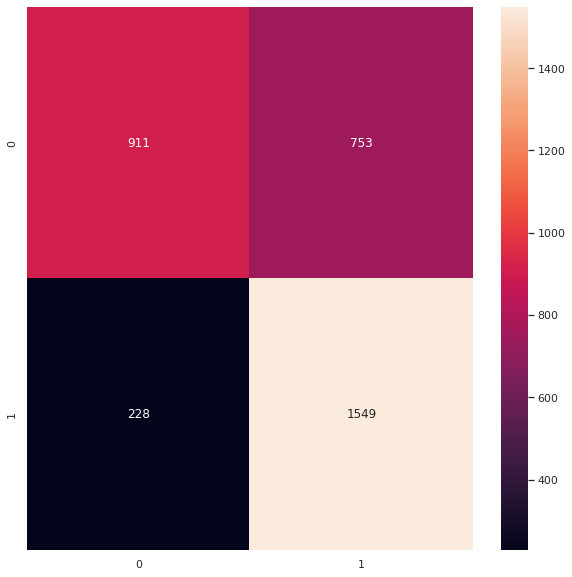

In [59]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# %matplotlib inline
sns.set(rc = {'figure.figsize': (10,10)})
sns.heatmap(cm_train, annot=True, fmt='d')

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-score: {f1_train}')

Accuracy: 0.7149084568439407
Precision: 0.6728931364031278
Recall: 0.8716938660664041
F1-score: 0.7594998774209366


Tuning the hiper parameters of the model

In [61]:
from sklearn.model_selection import GridSearchCV

C_values = [10.0**x for x in np.arange(-5, 1, 0.5)]
lr = LogisticRegression(penalty="l2", solver='liblinear')


searcher = GridSearchCV(estimator=lr, param_grid={'C': C_values}, cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1e-05, 3.1622776601683795e-05, 0.0001,
                               0.00031622776601683794, 0.001,
                               0.0031622776601683794, 0.01, 0.03162277660168379,
                               0.1, 0.31622776601683794, 1.0,
                               3.1622776601683795]})

In [62]:
searcher.best_estimator_

LogisticRegression(C=0.00031622776601683794, solver='liblinear')

In [63]:
searcher.best_params_

{'C': 0.00031622776601683794}

In [64]:
best_C= searcher.best_params_['C']
best_C

0.00031622776601683794

In [65]:
lr = LogisticRegression(penalty="l2", C=best_C, solver='liblinear') # best C: C=3.1622776601683795
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

Metrics on testing set

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average, zero_division=0)
    recall = recall_score(target, prediction, average=average, zero_division=0)
    f1 = f1_score(target, prediction, average=average, zero_division=0)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [67]:
print_results(calculate_metrics(y_train, y_pred_train, average='weighted'), classifier_id=f"LR {best_C} TRAIN SET")
print_results(calculate_metrics(y_test, y_pred, average='weighted'), classifier_id=f"LR {best_C} TEST SET")

Results for LR 0.00031622776601683794 TRAIN SET
----
  Accuracy:  0.7204301075268817
  Precision: 0.742606081627934
  Recall:    0.7204301075268817
  F1 score:  0.7115497190332225
  Mislabeled 962 out of 3441


Results for LR 0.00031622776601683794 TEST SET
----
  Accuracy:  0.727061556329849
  Precision: 0.748398260704021
  Recall:    0.727061556329849
  F1 score:  0.7188376423914661
  Mislabeled 235 out of 861


